### Data Science Projct

+ in tnis project we are going to predict if a patient will lives or dies based on a give parameters using ML methods

### WorkFlow
<ul>
<li><span style="color: #0000ff;"><strong>Data Prep</strong></span></li>
<li><span style="color: #0000ff;"><strong>EDA</strong></span></li>
<li><span style="color: #0000ff;"><strong>Features Selection</strong></span></li>
<li><span style="color: #0000ff;"><strong>Build Model</strong></span></li>
<li><span style="color: #0000ff;"><strong>Interpret Model&nbsp;</strong></span></li>
<li><span style="color: #0000ff;"><strong>Serialization</strong></span></li>
<li><span style="color: #0000ff;"><strong>Production with Streamlit or Flask</strong></span></li>
</ul>
<p>&nbsp;</p>

### 1- Data Prep

In [1]:
import pandas as pd
import numpy as np


In [2]:
# Load Data Viz Pkg
import matplotlib.pyplot as plt
import seaborn as sns


<ul>
<li>
<p><strong><span style="color: #0000ff;"> ## Attribute Information:</span></strong></p>
<p>1. <strong><span style="color: #993366;">Class:</span> <em><span style="color: #ff0000;">DIE, LIVE</span></em></strong><br />2. <strong><span style="color: #993366;">AGE</span></strong>: 10, 20, 30, 40, 50, 60, 70, 80<br />3. <strong><span style="color: #993366;">SEX</span></strong>: male, female<br />4. <strong><span style="color: #993366;">STEROID</span></strong>: no, yes<br />5. <strong><span style="color: #993366;">ANTIVIRALS</span></strong>: no, yes<br />6. <strong><span style="color: #993366;">FATIGUE</span></strong>: no, yes<br />7. <strong><span style="color: #993366;">MALAISE</span></strong>: no, yes<br />8. <strong><span style="color: #993366;">ANOREXIA</span></strong>: no, yes<br />9. <strong><span style="color: #993366;">LIVER BIG</span></strong>: no, yes<br />10. <strong><span style="color: #993366;">LIVER FIRM</span></strong>: no, yes<br />11. <strong><span style="color: #993366;">SPLEEN PALPABLE</span></strong>: no, yes<br />12. <strong><span style="color: #993366;">SPIDERS</span></strong>: no, yes<br />13.<strong><span style="color: #993366;"> ASCITES:</span></strong> no, yes<br />14. <strong><span style="color: #993366;">VARICES:</span> </strong>no, yes<br />15. <strong><span style="color: #993366;">BILIRUBIN</span></strong>: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00<br />-- see the note below<br />16. <strong><span style="color: #993366;">ALK PHOSPHATE</span></strong>: 33, 80, 120, 160, 200, 250<br />17. <strong><span style="color: #993366;">SGOT:</span></strong> 13, 100, 200, 300, 400, 500,<br />18. <strong><span style="color: #993366;">ALBUMIN:</span></strong> 2.1, 3.0, 3.8, 4.5, 5.0, 6.0<br />19. <strong><span style="color: #993366;">PROTIME</span></strong>: 10, 20, 30, 40, 50, 60, 70, 80, 90<br />20. <strong><span style="color: #993366;">HISTOLOGY</span></strong>: no, yes</p>
</li>
</ul>

In [3]:
col_names = ["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM","SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME","ISTOLOGY"]

In [4]:
# Load our  Dataset
df = pd.read_csv("../data/hepatitis.data", names = col_names)

In [5]:
# Preview the first datapiont
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,ISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [6]:
# clean a column Names
df.columns

Index(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'ISTOLOGY'],
      dtype='object')

In [7]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [8]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,istology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [9]:
#Data Types
df.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
istology            int64
dtype: object

In [10]:
# Replace ? with 0
df = df.replace('?', 0)

In [11]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
istology            int64
dtype: object

In [12]:
sum(df.dtypes =='object')

15

In [13]:
df.columns[df.dtypes =='object']

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

In [14]:
df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot','protime']].astype(int)

In [15]:
df[['bilirubin','albumin']]  = df[['bilirubin','albumin']].astype(float)

In [16]:
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palpable      int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate        int64
sgot                 int64
albumin            float64
protime              int64
istology             int64
dtype: object

In [17]:
 ### count of each row
df.count()

class              155
age                155
sex                155
steroid            155
antivirals         155
fatigue            155
malaise            155
anorexia           155
liver_big          155
liver_firm         155
spleen_palpable    155
spiders            155
ascites            155
varices            155
bilirubin          155
alk_phosphate      155
sgot               155
albumin            155
protime            155
istology           155
dtype: int64

In [18]:
df.shape

(155, 20)

In [19]:
#### Missing values

df.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
istology           0
dtype: int64

In [20]:
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,istology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [21]:
target_label = {"Die":1, "Live":2}

In [22]:
## Value counts
df['class'].value_counts()

2    123
1     32
Name: class, dtype: int64

<AxesSubplot:ylabel='class'>

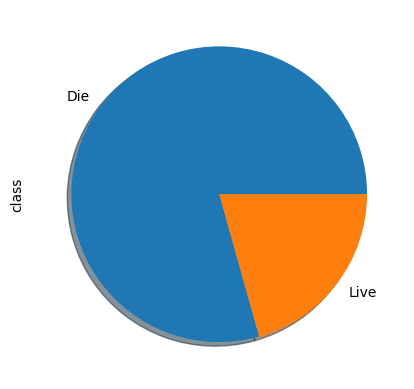

In [23]:
#Plot of count
df['class'].value_counts().plot(kind = 'pie', labels = ['Die', 'Live'], shadow = True)


In [24]:
## How many are males and females

df['sex'].unique()

array([2, 1])

In [25]:
df['sex'].value_counts()

1    139
2     16
Name: sex, dtype: int64

<AxesSubplot:>

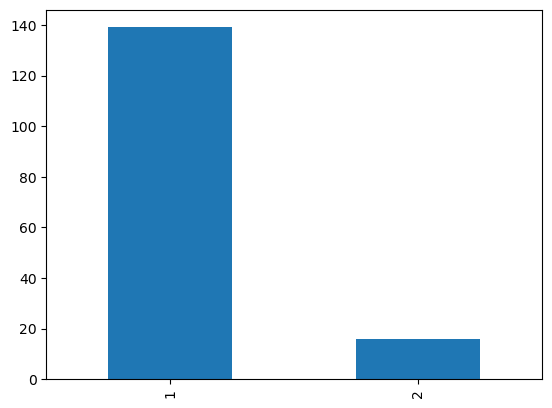

In [26]:
df['sex'].value_counts().plot(kind="bar")

### 
+ In this dataset there is more male then females

In [27]:
### Age Range
df.groupby(['age', 'sex']).size()

age  sex
7    1      1
20   1      2
     2      1
22   1      1
     2      1
23   1      4
24   1      2
25   1      2
     2      1
26   2      1
27   1      4
28   1      4
     2      1
30   1      7
     2      1
31   1      4
32   1      4
33   1      3
34   1      6
     2      2
35   1      2
36   1      7
37   1      5
38   1      8
39   1      6
40   1      3
41   1      2
     2      1
42   1      5
43   1      1
44   1      5
45   1      4
     2      1
46   1      1
47   1      4
48   1      2
49   1      3
50   1      5
     2      1
51   1      6
52   1      3
53   2      1
54   1      5
56   1      3
57   1      2
58   1      1
     2      1
59   1      1
60   1      1
61   1      3
62   1      1
     2      1
64   1      1
65   1      1
66   1      1
67   2      1
69   2      1
70   1      1
72   1      1
78   1      1
dtype: int64

#### Frequency Distribution Table the age Range


In [28]:
df['age'].max()

78

In [29]:
df['age'].min()

7

In [30]:
labels = ["Less than 10", "10-20", "20-30", "30-40", "40-50","50-60","60-70","70 and more"]
bins = [0,10,20,30,40,50,60,70,80]
freq_df = df.groupby(pd.cut(df['age'], bins=bins, labels=labels)).size()

In [31]:
freq_df

age
Less than 10     1
10-20            3
20-30           29
30-40           50
40-50           35
50-60           24
60-70           11
70 and more      2
dtype: int64

In [32]:
freq_df = freq_df.reset_index(name='count')

In [33]:
freq_df

,age,count
0,Less than 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70 and more,2


<AxesSubplot:>

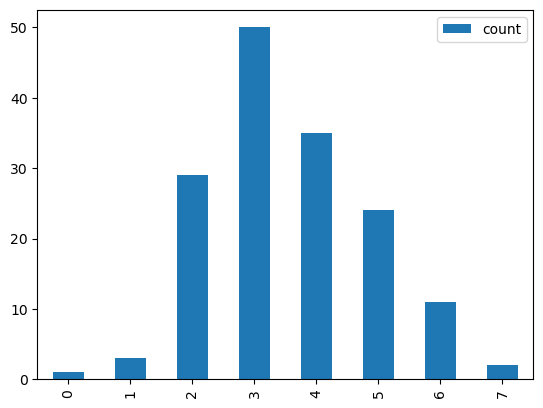

In [34]:
freq_df.plot(kind = 'bar')

<AxesSubplot:>

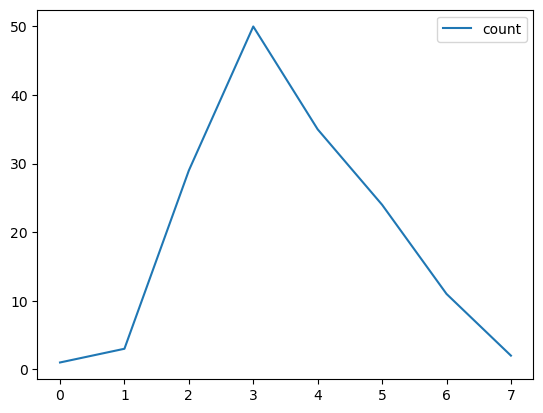

In [35]:
freq_df.plot(kind = 'line')

Text(0.5, 1.0, 'Frequency Count Of age')

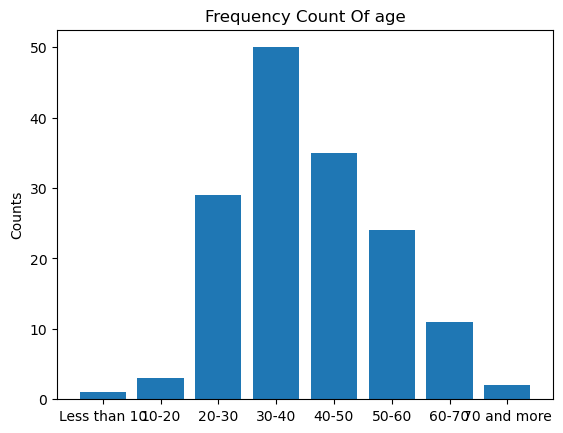

In [36]:
plt.bar(freq_df["age"], freq_df['count'])
plt.ylabel("Counts")
plt.title('Frequency Count Of age')

+ Highest prevalence Of hepatitis is from 30-40 followed by 40+50
+ the least is individual under 10, and elderly above 70

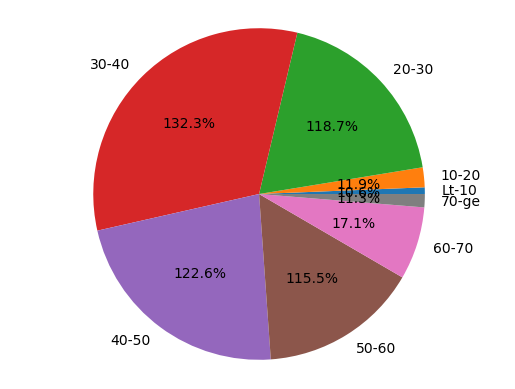

In [37]:
## Pie chart
labels = ["Lt-10", "10-20", "20-30", "30-40", "40-50","50-60","60-70","70-ge"]
fig1, ax1 = plt.subplots()
ax1.pie(freq_df['count'],labels = labels, autopct = "1%.1f%%")
ax1.axis('equal')
plt.show()

### Checking for outliers
+ Univariate Analysis
+ Multivariate analysis
### Methods
+Boxplot (univ)
+scatterplot (Multi)
+Z-score
+IQR interquatile Range


/home/omar/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

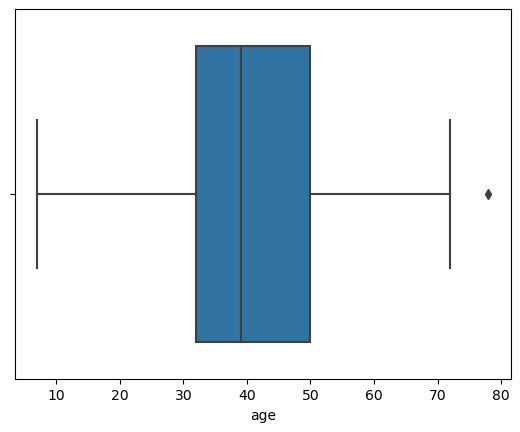

In [38]:
# using BoxPlot For Univariate Outlier Detection 
import seaborn as sns
sns.boxplot(df['age'])

/home/omar/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alk_phosphate'>

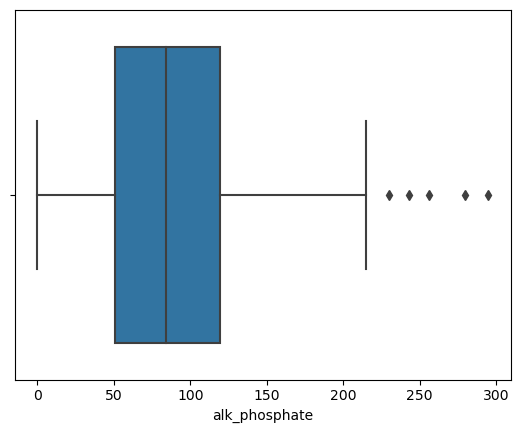

In [39]:
sns.boxplot(df['alk_phosphate'])

In [40]:
## outlyer
df[df['age']==78]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,istology
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1


/home/omar/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='steroid'>

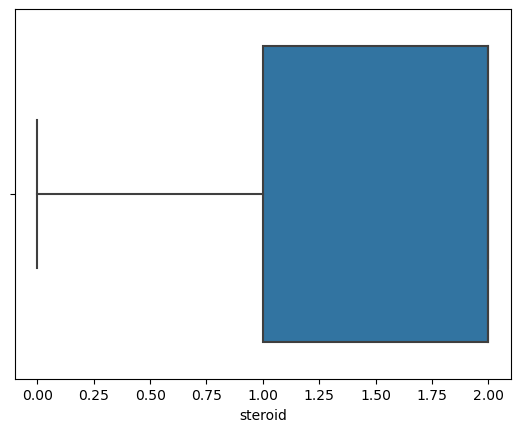

In [41]:
sns.boxplot(df['steroid'])

/home/omar/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='albumin'>

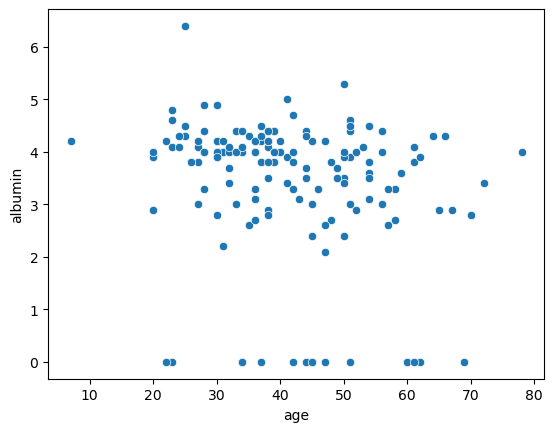

In [42]:
sns.scatterplot(df['age'], df['albumin'])

<AxesSubplot:xlabel='albumin', ylabel='age'>

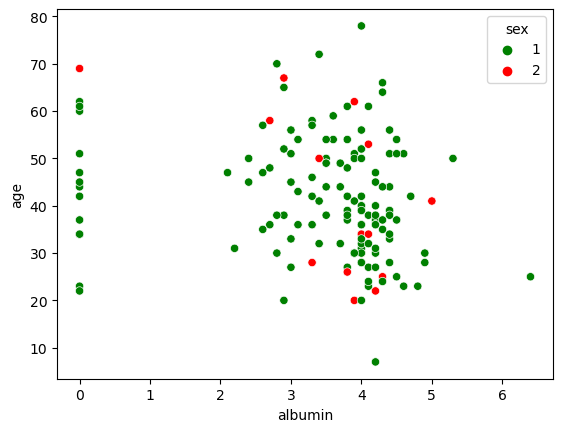

In [43]:
#scatter plot
sns.scatterplot(y = df['age'], x = df['albumin'], hue = df['sex'], palette=["green", "red"], data = df)

## using interquartile Range (IQR)
+H-Spread /Mid_spread
+ Measures the statistical Dispersion/spread
+ IQR  = Quantile 3(75) - 1(25)

In [44]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [45]:
IQR = q3 - q1

In [46]:
IQR

class               0.00
age                18.00
sex                 0.00
steroid             1.00
antivirals          0.00
fatigue             1.00
malaise             1.00
anorexia            0.00
liver_big           0.00
liver_firm          1.00
spleen_palpable     0.00
spiders             1.00
ascites             0.00
varices             0.00
bilirubin           0.80
alk_phosphate      68.50
sgot               68.50
albumin             1.15
protime            65.00
istology            1.00
dtype: float64

In [47]:
### Get the actual datapoint that is an outlier 
(df <(q1-1.5 * IQR)) | (df>(q3 + 1.5 * IQR))

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,istology
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
153,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


### 
+ the data points with true are oulier 
### solution
+REmove
+Change
+Ignore

In [48]:
df_no_outlier = df[~((df <(q1 -1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis = 1)]

In [49]:
df_no_outlier

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,istology
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,0,48,4.4,0,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,120,3.9,0,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1
16,2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.2,102,53,4.3,0,1
17,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.6,62,166,4.0,63,1
18,2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.7,53,42,4.1,85,2
22,2,31,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,20,4.0,100,1
23,2,42,1,2,2,2,2,2,2,2,2,2,2,2,0.9,60,63,4.7,47,1


In [50]:
print(df.shape)

(155, 20)


In [51]:
print(df_no_outlier.shape)

(43, 20)


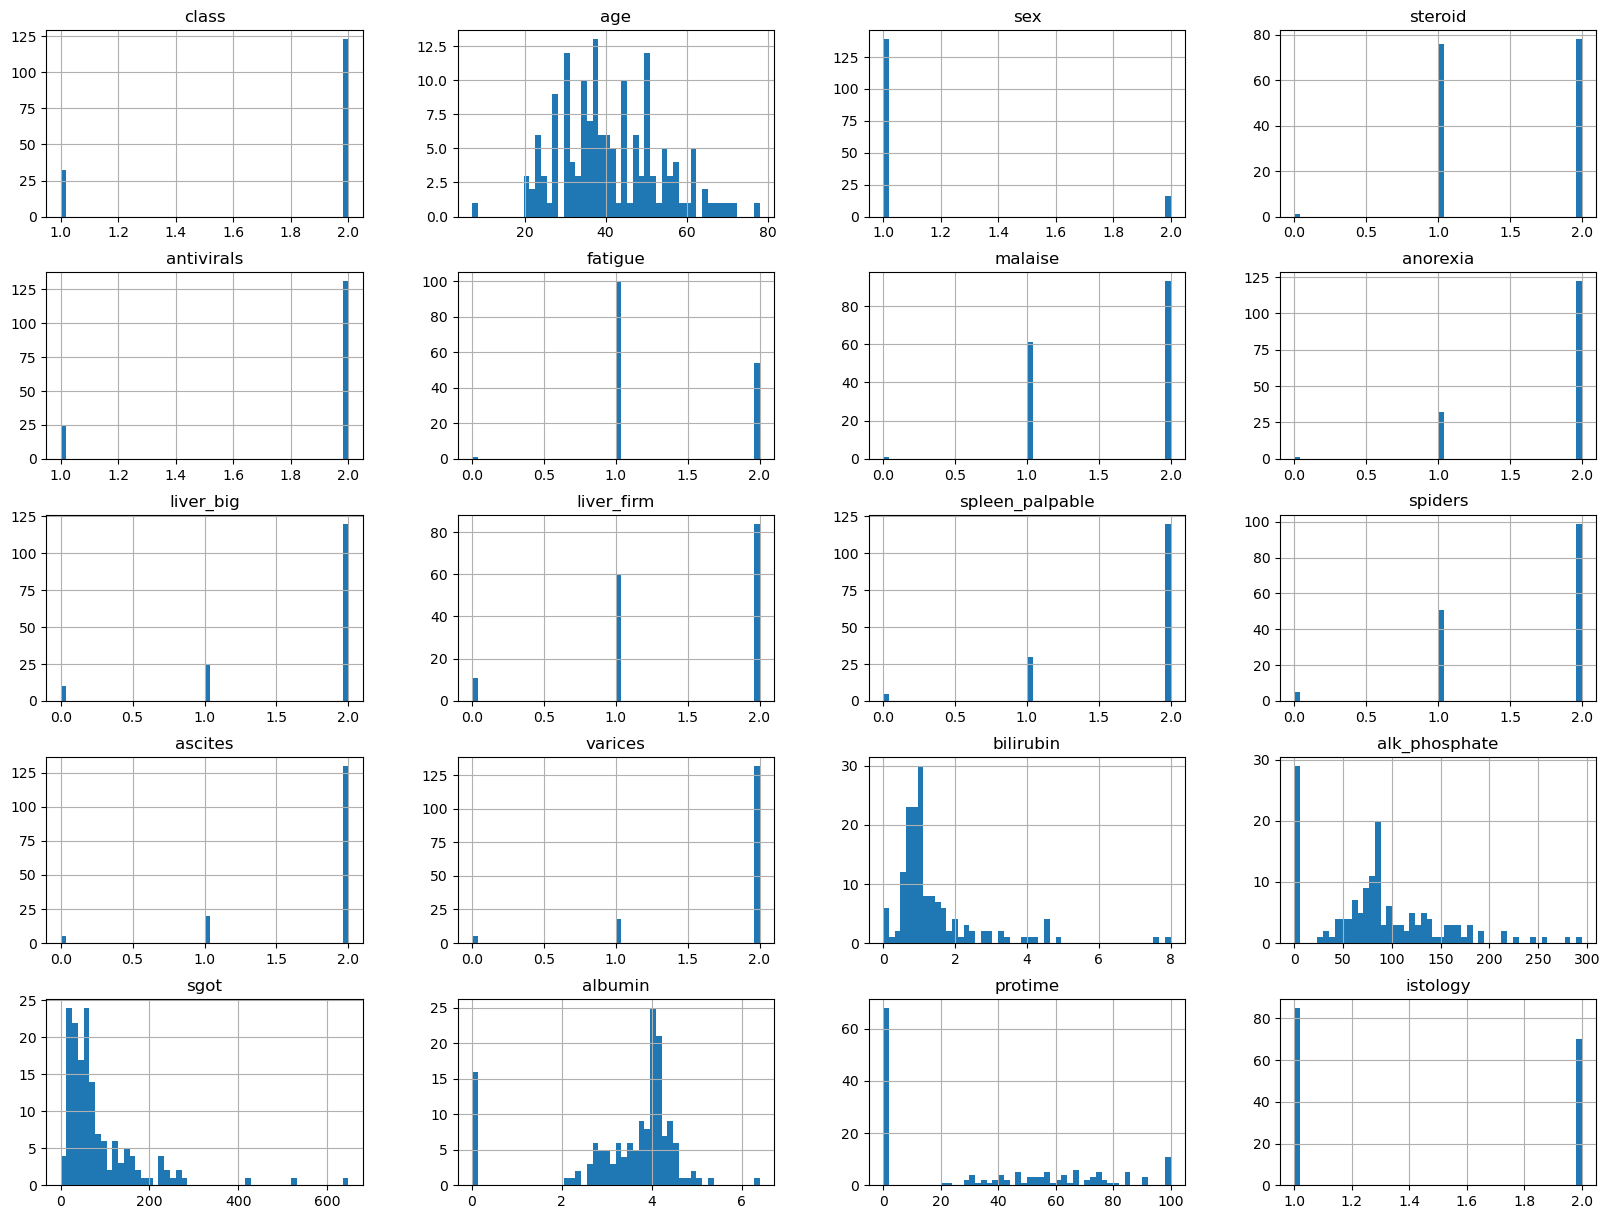

In [52]:
### Plot of dsitribution of data
df.hist(bins =50, figsize = (20, 15))
plt.show()

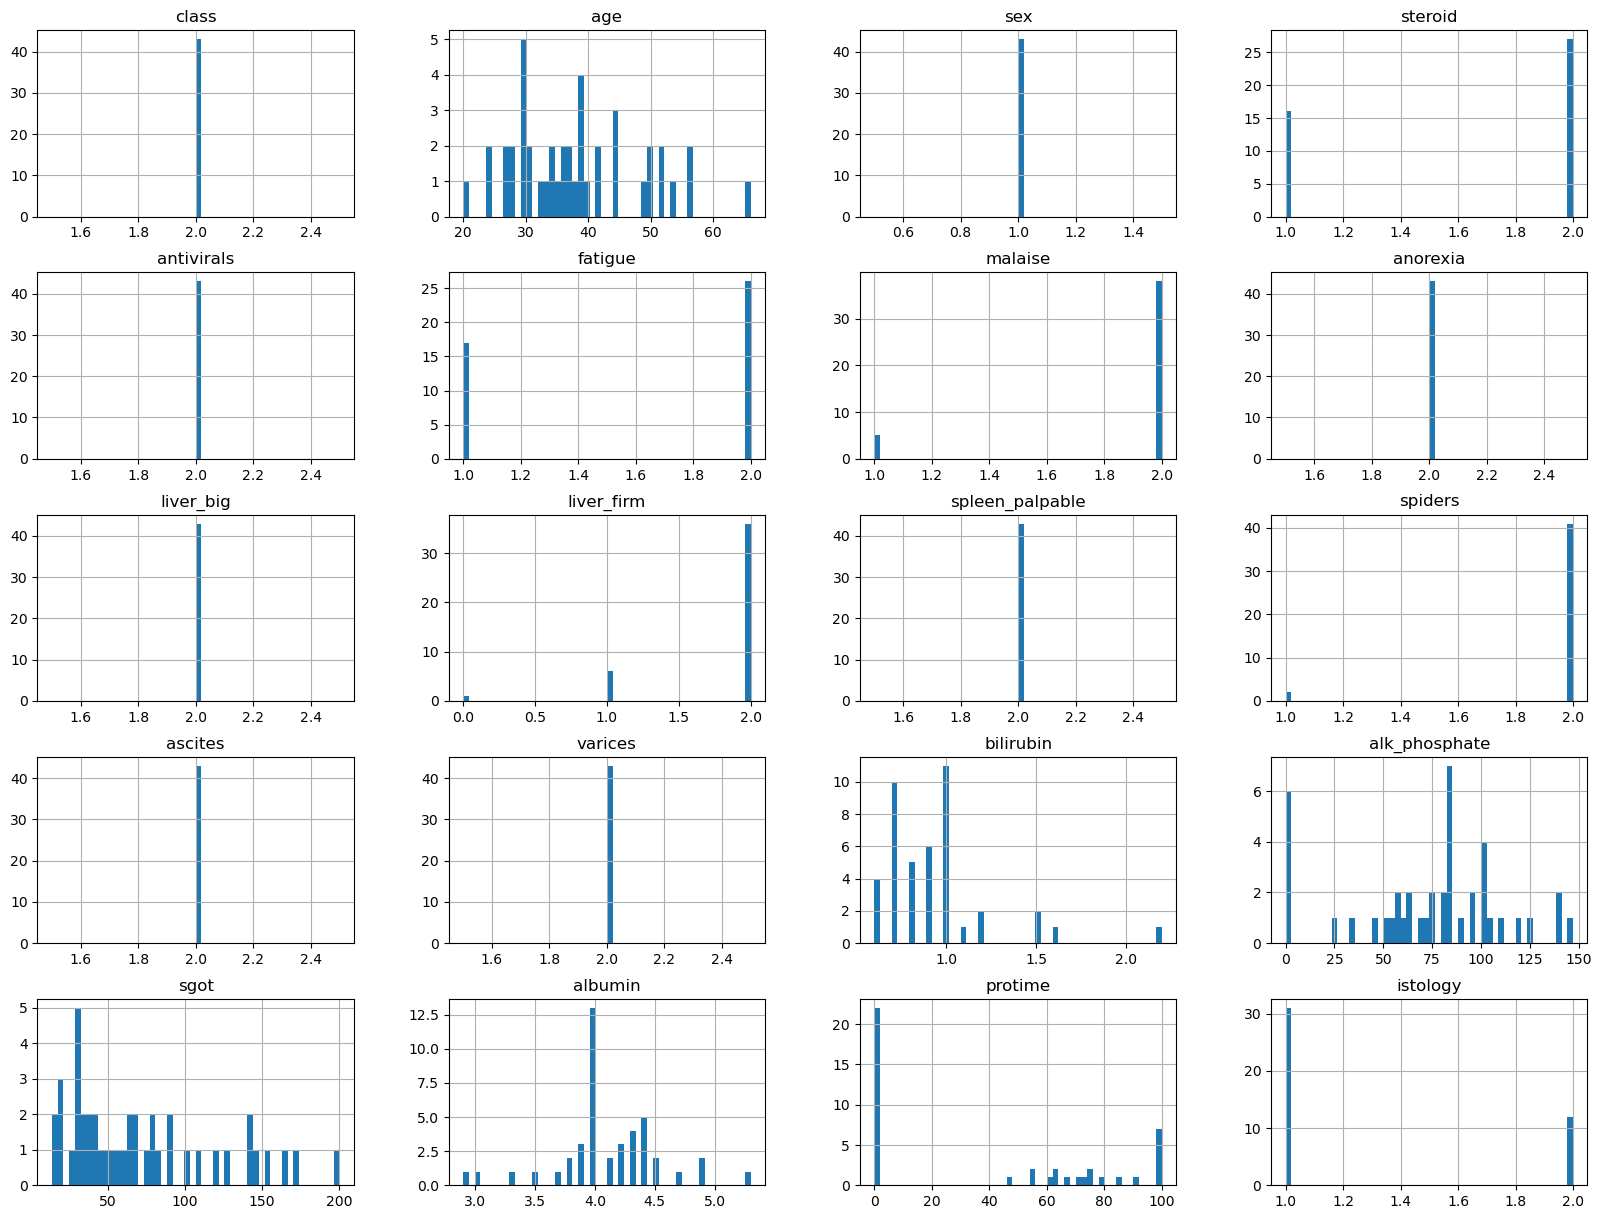

In [53]:
### Plot of dsitribution of data
df_no_outlier.hist(bins =50, figsize = (20, 15))
plt.show()

### Feature selection and Importance
+ SelctKbest
        -Strong relation with the output/target
+ Recursive Feature Elimination


In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [55]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,istology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [56]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'istology'],
      dtype='object')

In [57]:
xfeatures = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'istology']]

In [58]:
ylabels = df['class']

In [59]:
# using SKBest
skb = SelectKBest(score_func = chi2, k = 10)
best_features_fit = skb.fit(xfeatures, ylabels)

In [60]:
# Highest score shows the best fit 
print("Scores", best_features_fit.scores_)

Scores [ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247172  17.88270548
  47.38820795   6.87318606 130.18332457   3.01854675]


In [61]:
# treansform(Optional)
bf_02 = best_features_fit.transform(xfeatures)

In [62]:
bf_02

array([[30. ,  2. ,  2. , ...,  4. ,  0. ,  1. ],
       [50. ,  1. ,  2. , ...,  3.5,  0. ,  1. ],
       [78. ,  1. ,  2. , ...,  4. ,  0. ,  1. ],
       ...,
       [61. ,  1. ,  1. , ...,  4.1,  0. ,  2. ],
       [53. ,  1. ,  2. , ...,  4.1, 48. ,  2. ],
       [43. ,  1. ,  2. , ...,  3.1, 42. ,  2. ]])

In [63]:
# MApping to Features NAme
feature_scores = pd.DataFrame(best_features_fit.scores_,columns = ['Features_Scores'])

In [64]:
feature_scores

,Features_Scores
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [65]:
feature_column_names = pd.DataFrame(xfeatures.columns, columns = ['Features_name'])
best_feat_df = pd.concat([feature_scores, feature_column_names], axis = 1)

In [66]:
best_feat_df

,Features_Scores,Features_name
0,28.474819,age
1,0.389483,sex
2,0.399513,steroid
3,0.186342,antivirals
4,2.346432,fatigue
5,2.468032,malaise
6,0.196481,anorexia
7,0.316982,liver_big
8,0.986710,liver_firm
9,0.745352,spleen_palpable


In [67]:
# Get the best 
# the higher the number the more important the feature
best_feat_df.nlargest(10, 'Features_Scores')

,Features_Scores,Features_name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,istology
5,2.468032,malaise
4,2.346432,fatigue


In [68]:
best_feat_df.nlargest(12, 'Features_Scores')

,Features_Scores,Features_name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,istology
5,2.468032,malaise
4,2.346432,fatigue


In [69]:
best_feat_df.nlargest(12, 'Features_Scores')['Features_name'].unique()

array(['protime', 'sgot', 'bilirubin', 'age', 'alk_phosphate', 'albumin',
       'spiders', 'istology', 'malaise', 'fatigue', 'ascites', 'varices'],
      dtype=object)

### Recursive Feature Elimination 

In [70]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [71]:
logit = LogisticRegression()

In [72]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=9)

In [73]:
rfe_fit = rfe.fit(xfeatures, ylabels)

/home/omar/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/omar/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [74]:
### selected features 
selected_features = pd.DataFrame(rfe_fit.support_, columns = ['Select_Features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_, columns = ['ranking_Features'])

In [75]:
rfe_feature_df  = pd.concat([feature_column_names, selected_features, ranking_features], axis = 1)

In [76]:
rfe_feature_df

,Features_name,Select_Features,ranking_Features
0,age,False,7
1,sex,True,1
2,steroid,False,4
3,antivirals,False,8
4,fatigue,True,1
5,malaise,True,1
6,anorexia,True,1
7,liver_big,False,3
8,liver_firm,False,5
9,spleen_palpable,False,6


+ RFE we will eliminate the lower ranking or true 

### Checking for features Importance 
+ ExtraTreeClassifier
+ Which feature is important 

In [77]:
from sklearn.ensemble import ExtraTreesClassifier 

In [78]:
## 
et_clf = ExtraTreesClassifier()
et_clf.fit(xfeatures, ylabels)

ExtraTreesClassifier()

In [79]:
# Print Important 
print(et_clf.feature_importances_)

[0.06080342 0.02366856 0.02675722 0.01170093 0.02969872 0.05515459
 0.02738203 0.03978999 0.04739458 0.0376755  0.06755728 0.08957091
 0.05319175 0.10759655 0.06771681 0.05430411 0.07671235 0.06083223
 0.06249245]


In [80]:
feature_importance_df = pd.Series(et_clf.feature_importances_, index = xfeatures.columns)

In [81]:
feature_importance_df

age                0.060803
sex                0.023669
steroid            0.026757
antivirals         0.011701
fatigue            0.029699
malaise            0.055155
anorexia           0.027382
liver_big          0.039790
liver_firm         0.047395
spleen_palpable    0.037676
spiders            0.067557
ascites            0.089571
varices            0.053192
bilirubin          0.107597
alk_phosphate      0.067717
sgot               0.054304
albumin            0.076712
protime            0.060832
istology           0.062492
dtype: float64

<AxesSubplot:>

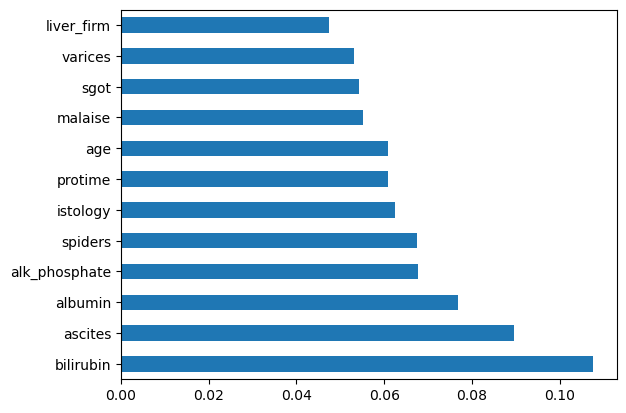

In [82]:
feature_importance_df.nlargest(12).plot(kind = "barh")

### 
+ All the methods gaves us almost the same features to use


In [83]:
## Correlation
df.corr()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,istology
class,1.000000,-0.219647,0.173051,0.121140,-0.130196,0.292206,0.315970,0.110715,0.102151,0.154736,0.180894,0.330194,0.332796,0.249610,-0.424523,-0.050806,-0.056679,0.296489,0.154688,-0.337856
age,-0.219647,1.000000,0.008126,-0.067710,-0.013100,-0.264635,-0.099516,0.100589,-0.126358,-0.100979,-0.127258,-0.206551,-0.125020,-0.114412,0.095626,0.045328,0.078021,-0.191174,-0.059956,0.170780
sex,0.173051,0.008126,1.000000,-0.039222,-0.089249,-0.063947,-0.020895,0.025186,0.023634,0.015750,-0.078414,-0.065592,0.049516,-0.005045,-0.039341,0.162851,-0.008991,-0.018906,0.067128,-0.137450
steroid,0.121140,-0.067710,-0.039222,1.000000,0.101657,0.146292,0.232041,0.084752,0.159877,0.095280,0.071401,0.029781,-0.002593,-0.029759,-0.005835,-0.042245,-0.021032,0.203109,0.032994,-0.070144
antivirals,-0.130196,-0.013100,-0.089249,0.101657,1.000000,-0.065578,-0.026703,-0.052554,-0.060626,-0.019871,-0.183070,-0.176367,-0.176382,-0.167721,0.177958,0.041764,0.095980,-0.153939,-0.276452,0.209242
fatigue,0.292206,-0.264635,-0.063947,0.146292,-0.065578,1.000000,0.617660,0.419991,0.168796,0.254621,0.226850,0.380935,0.288877,0.217311,-0.243964,-0.110505,-0.175476,0.198983,0.073783,-0.131177
malaise,0.315970,-0.099516,-0.020895,0.232041,-0.026703,0.617660,1.000000,0.631662,0.192556,0.197903,0.145236,0.376666,0.376182,0.267029,-0.269910,-0.114810,-0.177297,0.224605,0.067186,-0.116964
anorexia,0.110715,0.100589,0.025186,0.084752,-0.052554,0.419991,0.631662,1.000000,0.185164,0.144556,0.185004,0.371874,0.301514,0.288883,-0.244095,0.035984,-0.188183,0.133743,0.108322,-0.049702
liver_big,0.102151,-0.126358,0.023634,0.159877,-0.060626,0.168796,0.192556,0.185164,1.000000,0.698517,0.338963,0.370229,0.339108,0.238645,-0.028856,0.018895,-0.026293,0.105555,0.174677,-0.104757
liver_firm,0.154736,-0.100979,0.015750,0.095280,-0.019871,0.254621,0.197903,0.144556,0.698517,1.000000,0.322955,0.407114,0.310338,0.295100,-0.069352,-0.179977,-0.149876,0.059700,0.083312,-0.206632


<AxesSubplot:>

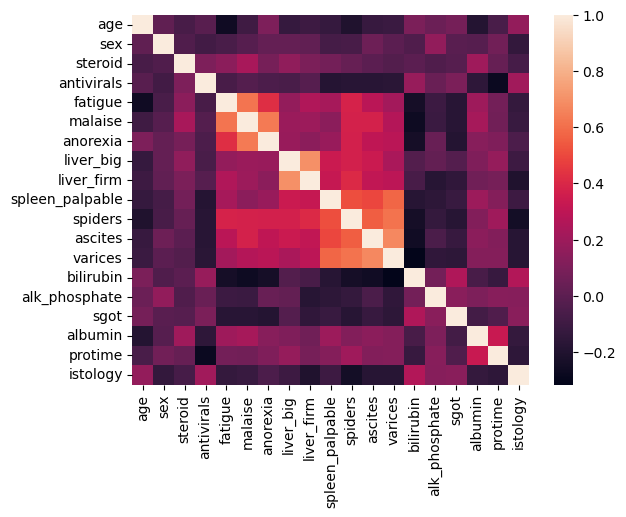

In [84]:
##heatmap for correlation
sns.heatmap(xfeatures.corr())

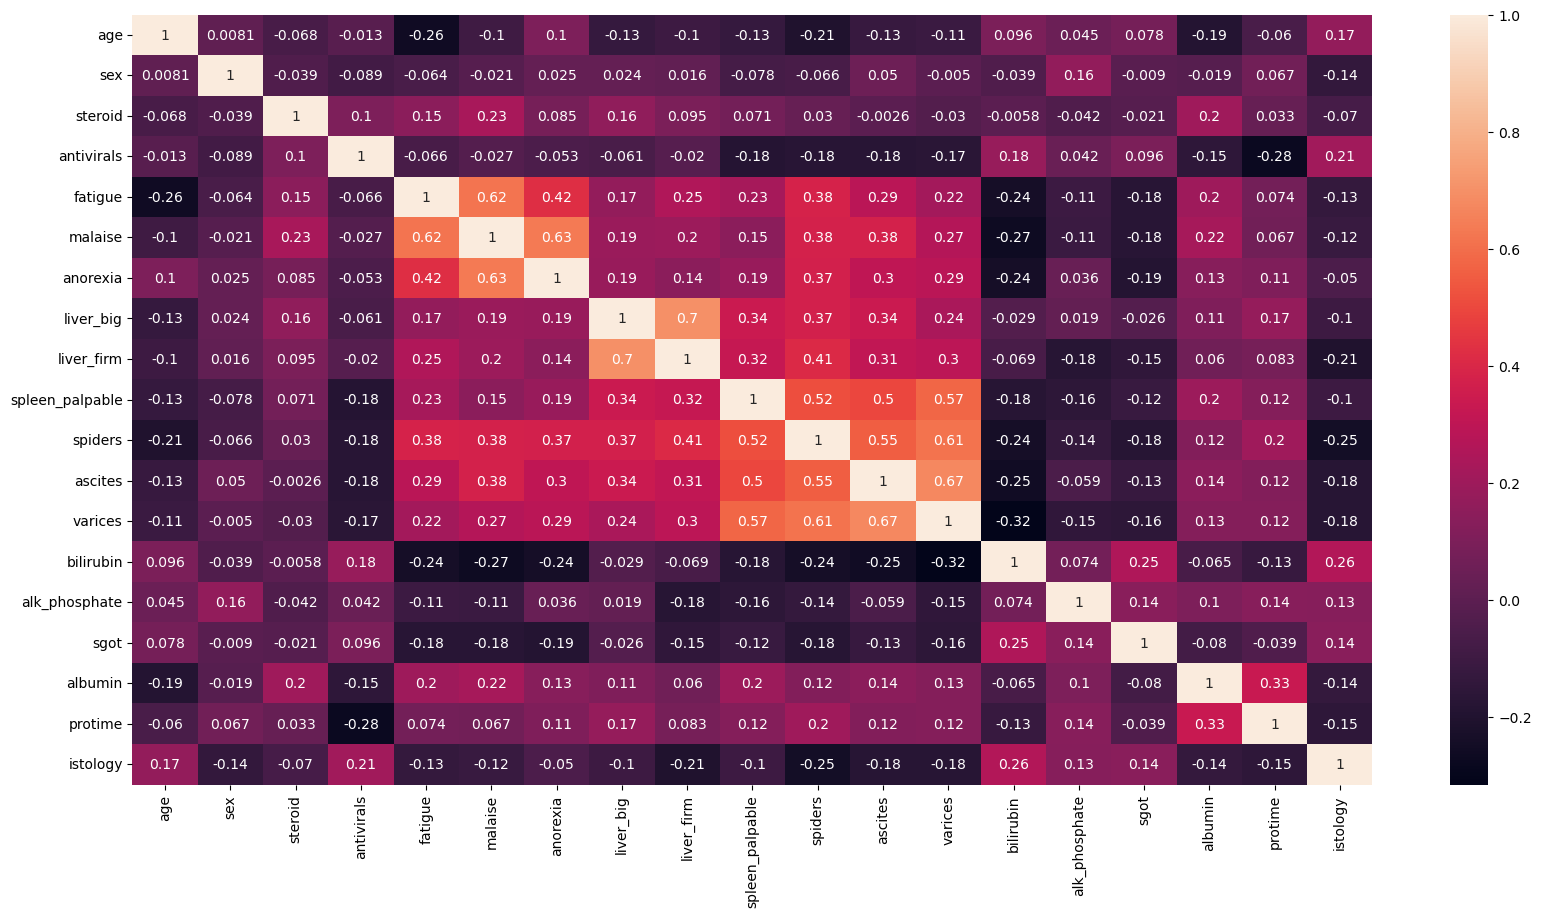

In [85]:
##heatmap for correlation
plt.figure(figsize = (20,10))
sns.heatmap(xfeatures.corr(), annot = True)
plt.show()

### model Building 
+ Features & Labels
+ Train/test/ Split
+ LogisticRegression
+ RF
+ DCT 
+ Serialize

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [87]:
# Features for initial Data
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'istology'],
      dtype='object')

In [88]:
xfeatures

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,istology
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,0,242,3.3,50,2
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,0,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,0,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [89]:
ylabels = df['class']

In [90]:
### Selected Features 
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'istology'],
      dtype='object')

In [91]:
xfeatures_best = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'istology']]

In [92]:
# train /text /dataset
x_train, x_test, y_train, y_test = train_test_split(xfeatures, ylabels, test_size = 0.30, random_state = 7)

In [93]:
#train/test for best features
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(xfeatures_best, ylabels, test_size = 0.30, random_state = 7)

In [94]:
#building Our Models
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/home/omar/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
logreg.score(x_test,y_test)

0.723404255319149

In [96]:
logreg.predict(x_test)

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2])

In [97]:
print(list(y_test))

[2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2]


In [98]:
accuracy_score(y_test,logreg.predict(x_test))

0.723404255319149

In [99]:
# Methods2
logreg_b = LogisticRegression()
logreg_b.fit(x_train_b, y_train_b)

/home/omar/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
logreg_b.score(x_test_b,y_test_b)

0.723404255319149

In [178]:
x1 = x_test.iloc[1]

In [101]:
x_test.iloc[0]

age                 50.0
sex                  2.0
steroid              1.0
antivirals           2.0
fatigue              1.0
malaise              2.0
anorexia             2.0
liver_big            1.0
liver_firm           1.0
spleen_palpable      1.0
spiders              1.0
ascites              2.0
varices              2.0
bilirubin            0.9
alk_phosphate      230.0
sgot               117.0
albumin              3.4
protime             41.0
istology             2.0
Name: 90, dtype: float64

In [166]:
res_dic = {"Die":1, "Live":2}
x1 = x_test.iloc[1]

In [103]:
logreg.predict(np.array(x1).reshape(1,-1))

/home/omar/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

## Alternative Algorithms
**DecisionTreeClassifier()**

In [104]:
clf = DecisionTreeClassifier()

In [106]:
## Fit 
clf.fit(x_train_b, y_train_b)

DecisionTreeClassifier()

In [107]:
# Model accuracy Score
clf.score(x_test_b, y_test_b)

0.7659574468085106

In [109]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier

In [110]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [113]:
knn.fit(x_train_b, y_train_b)

KNeighborsClassifier(n_neighbors=3)

In [114]:
# Fit 
knn.score(x_test_b, y_test_b)

/home/omar/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7446808510638298

### Save Our Models
+ Serialisation
+ Pickle
+ Joblib
+ numpy/ json/ray

In [115]:
## Using Joblib
import joblib

In [183]:
model_file = open("logistic_regression_hepB_model.pkl","wb")
joblib.dump(logreg_b, model_file)
model_file.close()

In [184]:
model_file_knn = open("knn_hepB_model.pkl","wb")
joblib.dump(knn, model_file_knn)
model_file.close()

In [185]:
model_file_clf = open("decission_tree_clf_hepB_model.pkl","wb")
joblib.dump(clf, model_file_clf)
model_file.close()

In [186]:
### Create Decission Tree Plot 
from IPython.display import Image
from sklearn import tree
import pydotplus

In [187]:
xfeatures.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'istology'],
      dtype='object')

In [188]:
feature_names_best = xfeatures_best.columns

In [189]:
target_names = ["Die", "Live"]

In [190]:
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = feature_names_best,class_names = target_names)

In [191]:
## Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

In [192]:
graph

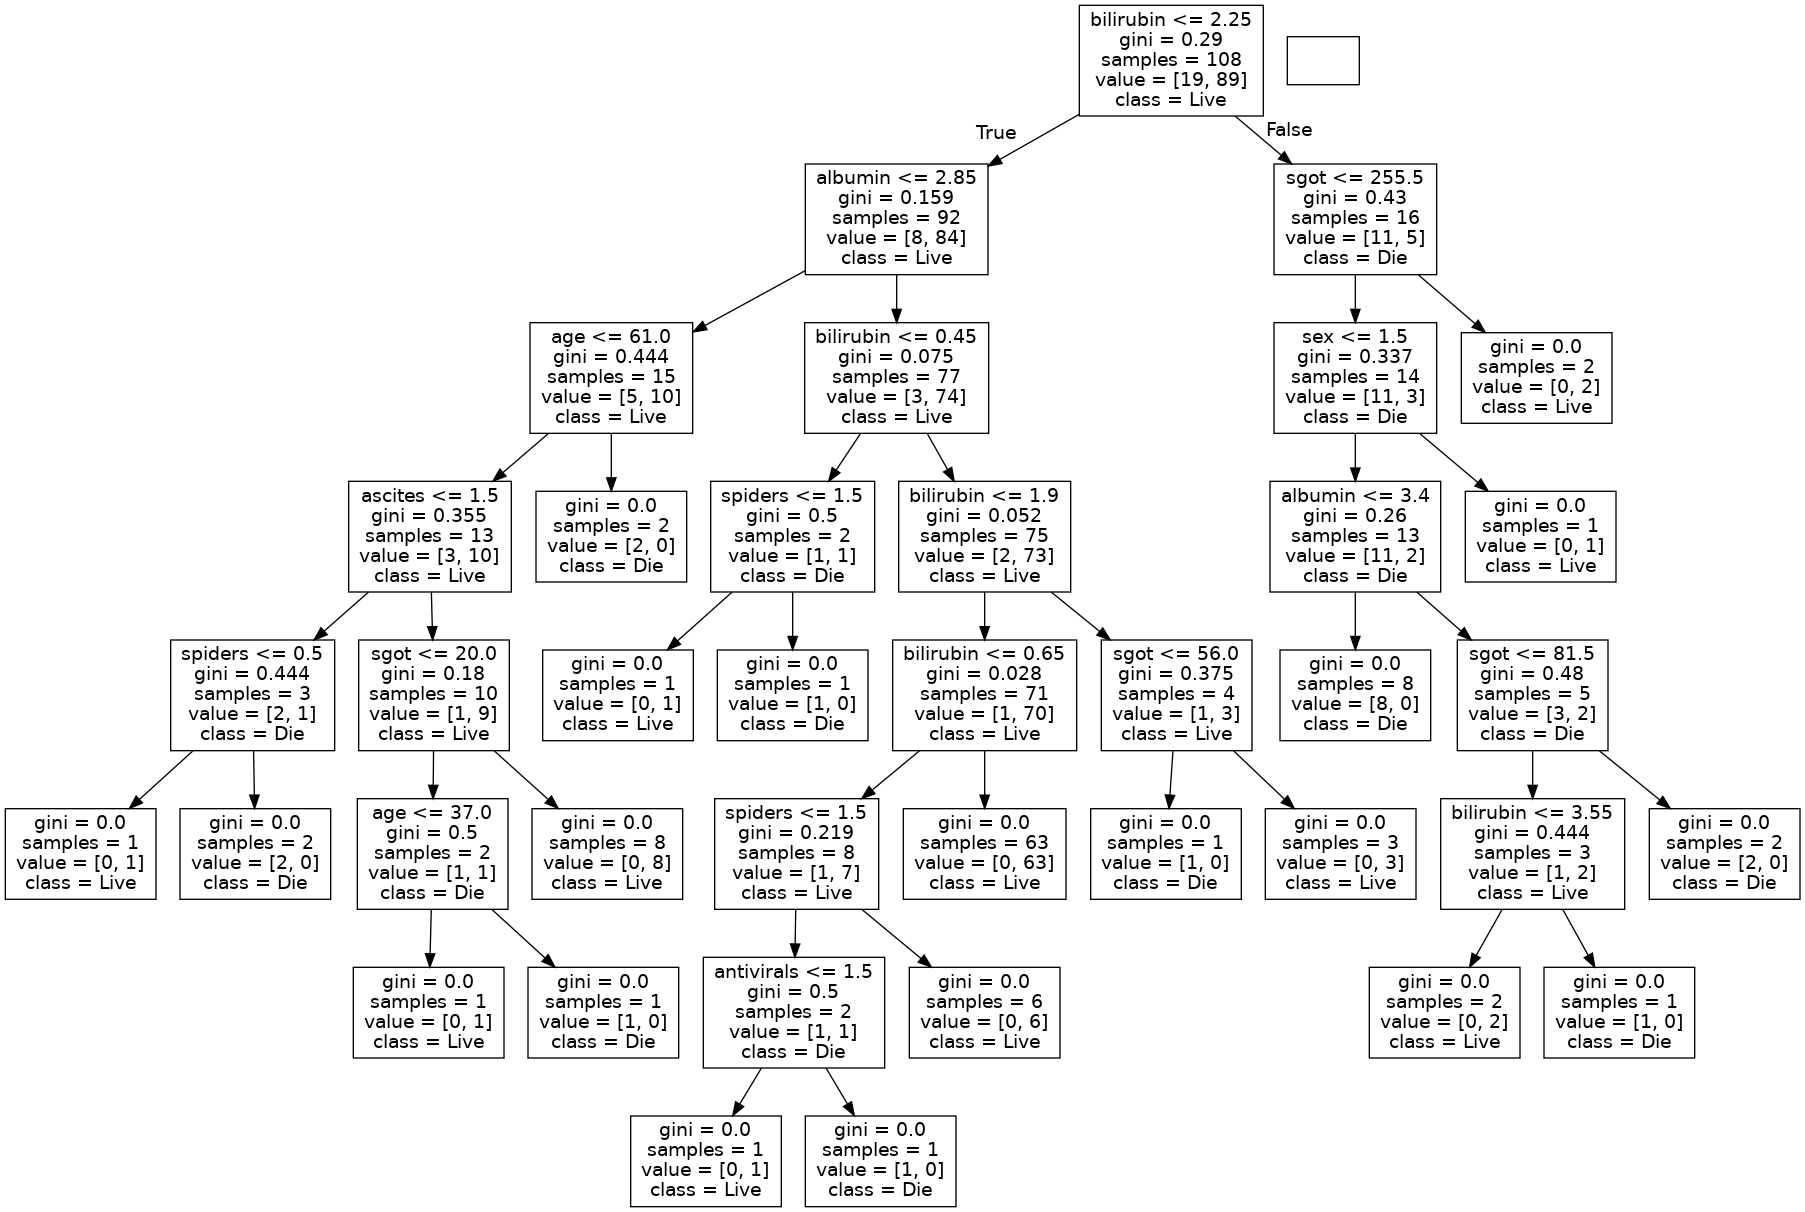

In [193]:
Image(graph.create_png())

In [194]:
graph.write_png("hep_decissition_tree_plot.png")

True

### Interpret Model & Evaluate
 + ELi5
 + Lime
 + Skater
 + SHAP

In [195]:
# Intepreting with Lime 
import lime
import lime.lime_tabular


In [196]:
dir(lime)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'discretize',
 'exceptions',
 'explanation',
 'lime_base',
 'lime_tabular']

# Create Lime explainer 
+ LimeTabularExplainer = Tables
+LimeTextExplainer = Text
+ LimeImageExplainer = Images

In [197]:
feature_names_best

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'istology'],
      dtype='object')

In [198]:
target_names

['Die', 'Live']

In [199]:
class_names = ["Die(1)", "Live(2)"]

In [200]:
#Create_Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(x_train_b.values, feature_names = feature_names_best, class_names = class_names,discretize_continuous = True)

In [203]:
len(x_test_b.iloc[1])

14

In [204]:
logreg_b.predict(np.array(x_test_b.iloc[1]).reshape(1,-1))


/home/omar/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [206]:
exp = explainer.explain_instance(x_test_b.iloc[1], logreg_b.predict_proba, num_features =14, top_labels = 1)

/home/omar/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [207]:
exp.show_in_notebook(show_table = True, show_all = False)

In [208]:
# Explaination as list
exp.as_list()

[('bilirubin > 1.50', -0.4324553627627774),
 ('sex <= 1.00', -0.23019724148576093),
 ('spiders <= 1.00', -0.1363689027088781),
 ('istology <= 1.00', 0.10639359275646182),
 ('alk_phosphate > 119.25', -0.10635467371017804),
 ('sgot > 90.50', 0.0970433010253377),
 ('age > 50.25', -0.052501750440156286),
 ('2.98 < albumin <= 4.00', 0.04390437004904475),
 ('protime <= 0.00', 0.04230435440231903),
 ('1.50 < steroid <= 2.00', 0.032992878475280665),
 ('fatigue <= 1.00', 0.018876299883836073),
 ('antivirals <= 2.00', 0.0),
 ('ascites <= 2.00', 0.0),
 ('varices <= 2.00', 0.0)]

In [211]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.6 MB/s eta 0:00:00 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 307.1 kB/s eta 0:00:00 kB/s eta 0:00:01:01
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107728 sha256=607bb6ce2b81f7f81136faef8699787630bfa823e14f74e9639700855585acd9
  Stored in directory: /home/omar/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.


In [213]:
# Using ELI5
import eli5

In [215]:
# Show how each features contribues 
eli5.show_weights(logreg_b,top = 10)

In [221]:
feature_names_best = ['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'istology']

In [222]:
# show  how each features 
eli5.show_weights(logreg_b, feature_names = feature_names_best, target_names = class_names)

Weight?,Feature
+1.139,sex
+0.747,spiders
+0.577,ascites
+0.502,albumin
+0.270,steroid
+0.018,<BIAS>
+0.004,sgot
-0.005,protime
-0.006,alk_phosphate
-0.016,age


In [224]:
# show  how each features 
eli5.show_prediction(logreg_b,x_test_b.iloc[1], feature_names = feature_names_best, target_names = class_names)

### Evaluation of model
+ Confusion Matrix
+ Classification Report
+ Accuracy core 

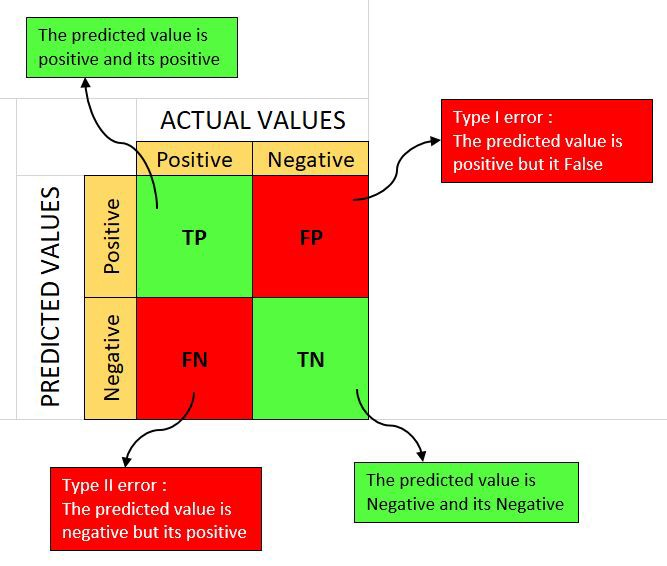

In [226]:
from sklearn.metrics import confusion_matrix

In [228]:
y_pred = logreg_b.predict(x_test_b)

In [231]:
# Accuracy Score 
accuracy_score(y_test_b, y_pred)

0.723404255319149

In [232]:
confusion_matrix(y_test, y_pred)

array([[ 2, 11],
       [ 2, 32]])

In [233]:
# plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix

/home/omar/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


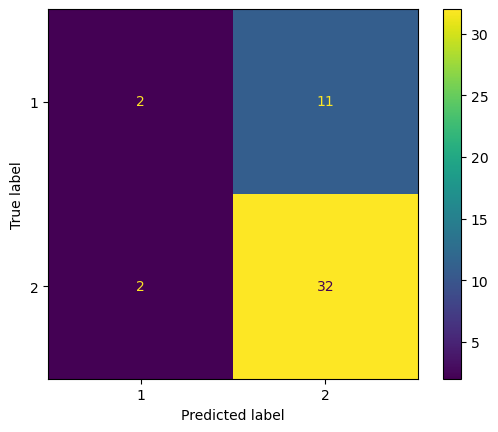

In [235]:
plot_confusion_matrix(logreg_b, x_test_b, y_test_b)

In [237]:
tp, tf,fn, tn = confusion_matrix(y_test_b, y_pred).ravel()

In [239]:
tp

2

In [240]:
## Clssifaction Report 
from sklearn.metrics import classification_report

In [241]:
print(classification_report(y_test_b,y_pred))

              precision    recall  f1-score   support

           1       0.50      0.15      0.24        13
           2       0.74      0.94      0.83        34

    accuracy                           0.72        47
   macro avg       0.62      0.55      0.53        47
weighted avg       0.68      0.72      0.67        47



### Alternative  Pandas_ml


In [242]:
class_names

['Die(1)', 'Live(2)']

In [243]:
print(classification_report(y_test, y_pred, target_names = class_names))

              precision    recall  f1-score   support

      Die(1)       0.50      0.15      0.24        13
     Live(2)       0.74      0.94      0.83        34

    accuracy                           0.72        47
   macro avg       0.62      0.55      0.53        47
weighted avg       0.68      0.72      0.67        47



In [246]:
#!pip install pandas-ml

AttributeError: module 'sklearn.metrics' has no attribute 'jaccard_similarity_score'

### Finally !!! 
                                                        **Done** 

In [ ]:
cm = ConfusionMatrix(y_test, y_pred)
cm.print_stats()
cm.plot(normalized=True)
plt.show()